In [31]:
#한글폰트
import matplotlib.font_manager as fm

#행렬처리 모듈
import numpy as np
#자료구조인 Series, DataFrame 등을 제공하는 모듈
import pandas as pd
#추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
#그래프 및 시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model
from sklearn.preprocessing import scale, robust_scale, minmax_scale
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)log_model = sm.Logit.from_formula("""SCALE ~  PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING+ C(WORK_GR) + 1""", ds_posco)
import os
from sklearn.feature_selection import RFE
#sklearn.tree 의 DecisionTreeClassifier : 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#GB
from sklearn.ensemble import GradientBoostingClassifier
#SVM
from sklearn.svm import SVC
#F1 Score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
#데이터 표준화 함수
from sklearn.preprocessing import StandardScaler

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname: plt.rcParams['font.family']='NanumBarunGothic'
    # 폰트 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False # '-'기호 제대로 나오게

['NanumBarunGothic']


In [32]:
ds_contract = pd.read_csv("../../실습화일/정수기렌탈/contract_fin.csv", encoding='euc-kr', engine='python')
ds_plan_contract = pd.read_csv("../../실습화일/정수기렌탈/plan-contract.csv", encoding='euc-kr', engine='python')
ds_plan_area_province = pd.read_csv("../../실습화일/정수기렌탈/plan-area-province.csv", encoding='euc-kr', engine='python')
ds_plan_dictionary = pd.read_csv("../../실습화일/정수기렌탈/plan-dictionary.csv", encoding='euc-kr', engine='python')
ds_user = pd.read_csv("../../실습화일/정수기렌탈/user_fin.csv", encoding='euc-kr', engine='python')
ds_merge = pd.read_csv("../../실습화일/정수기렌탈/merge2.csv", encoding = 'euc-kr', engine='python')
ds_data = pd.read_csv("../../실습화일/정수기렌탈/data_0222_updated.csv", encoding='euc-kr', engine='python')


In [33]:
ds_plan_contract

,Unnamed: 0,PRODUCT_NAME,NAME,CODE,TERM,PRICE
0,0,HIGH QUALITY,최상품,HIQ,12,1200000
1,1,HIGH MIDDLE QUALITY,편안한 최상품,HMQ,36,1200000
2,2,MIDDLE HIGH QUALITY,고급품,MIQ,12,800000
3,3,MIDDLE MIDDLE QUALITY,편안한 고급품,MMQ,36,800000
4,4,LOW HIGH QUALITY,실용품,EIQ,12,400000
5,5,LOW MIDDLE QUALITY,편안한 실용품,EMQ,36,400000


In [34]:
ds_plan_area_province

,서울시,부산시,경기도,충청도,경상도,전라도
0,강남구,사하구,포천시,청주시,함안군,광양시
1,양천구,해운대구,화성시,충주시,하동군,해남군
2,마포구,기장군,평택시,천안시,포항시 남구,익산시
3,강북구,연제구,가평군,홍성군,포항시 북구,곡성군
4,강동구,진구,안양시,진천군,거제시,구례군


In [35]:
#결측치 확인
#확인결과 결측치, 이상치 없음
ds_contract.isnull().sum(axis = 0)
ds_plan_area_province.isnull().sum(axis = 0)
ds_plan_dictionary.isnull().sum(axis = 0)
ds_data.isnull().sum(axis = 0)

Unnamed: 0      0
gender          0
customerType    0
age             0
marital         0
city            0
cityIS          0
residence       0
channel         0
credit          0
paymentCO       0
quantity        0
maxDay          0
overDue         0
gift            0
Termination     0
productCode     0
TERM            0
PRICE           0
provinceIS      0
province        0
payment         0
dtype: int64

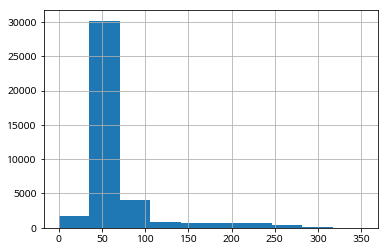

In [36]:
ds_merge["quantity"].hist()

In [37]:
ds_merge

,Unnamed: 0,seq,customerID,gender,customerType,age,marital,province,city,provinceIS,...,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination
0,0,1.0,837622.0,FEMALE,PERSONAL,50대,MARRIED,강북구,강동구,2급지,...,ETC.,서비스 방,MIDDLE,CMS,국민은행,45.5,6.0,0.0,0,1
1,1,2.0,954598.0,FEMALE,PERSONAL,30대,MARRIED,강북구,양천구,1급지,...,APART,렌탈재계약,MIDDLE,CARD,외환카드,41.6,6.0,0.0,0,0
2,2,3.0,695539.0,FEMALE,PERSONAL,50대,SINGLE,강북구,청주시,1급지,...,APART,하하영업방판,HIGHT,CARD,롯데카드,67.3,6.0,0.0,0,1
3,3,4.0,755318.0,FEMALE,PERSONAL,60대 이상,SINGLE,강북구,강동구,2급지,...,APART,전자랜드,MIDDLE,CMS,새마을금고,59.6,5.0,0.0,0,0
4,4,5.0,665969.0,FEMALE,PERSONAL,30대,MARRIED,강북구,해운대구,1급지,...,OFFICETEL,홈쇼핑/방송,MIDDLE,CARD,국민카드,70.8,5.0,0.0,0,1
5,5,6.0,853084.0,MALE,PERSONAL,30대,SINGLE,강북구,안양시,3급지,...,OFFICETEL,이마트,MIDDLE,CARD,국민카드,63.0,5.0,0.0,0,0
6,6,7.0,968101.0,MALE,PERSONAL,40대,MARRIED,강북구,해운대구,1급지,...,APART,하하영업방판,MIDDLE,CMS,국민은행,44.5,1.0,0.0,0,1
7,7,8.0,838826.0,FEMALE,PERSONAL,60대 이상,MARRIED,강북구,거제시,5급지,...,APART,렌탈재계약,MIDDLE,CMS,국민은행,60.3,0.0,0.0,0,1
8,8,9.0,882930.0,FEMALE,PERSONAL,50대,SINGLE,강북구,강남구,1급지,...,OFFICETEL,하하영업방판,MIDDLE,CARD,현대카드,59.6,3.0,0.0,0,0
9,9,10.0,784044.0,MALE,PERSONAL,40대,MARRIED,강북구,사하구,2급지,...,APART,렌탈총판,MIDDLE,CARD,롯데카드,55.6,1.0,0.0,0,0


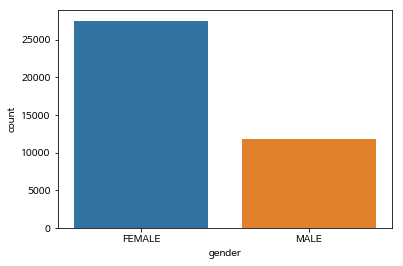

In [38]:
sns.countplot(x="gender", data=ds_merge)

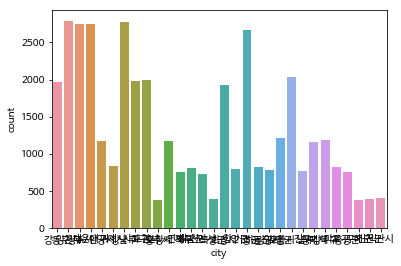

In [39]:
sns.countplot(x='city', data = ds_merge)

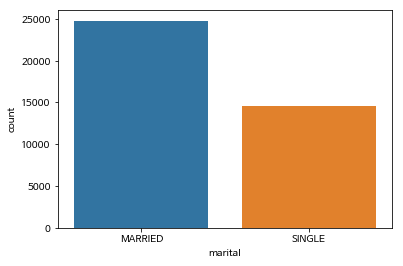

In [40]:
sns.countplot(x='marital', data = ds_merge)

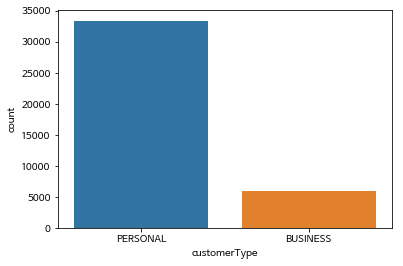

In [41]:
sns.countplot(x = 'customerType', data = ds_merge)

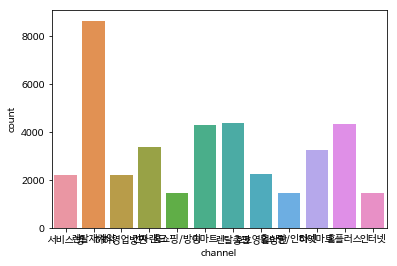

In [42]:
sns.countplot(x = 'channel', data = ds_merge)

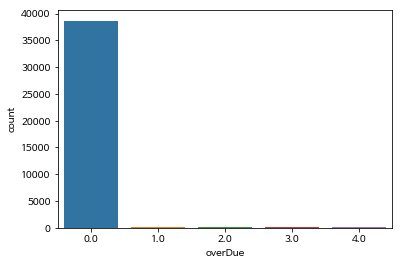

In [43]:
sns.countplot(x = 'overDue', data = ds_merge)

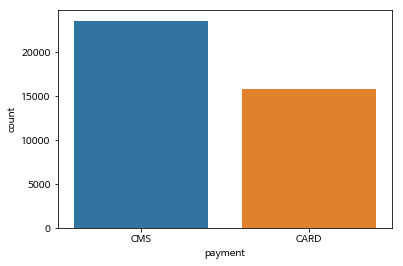

In [44]:
sns.countplot(x = 'payment', data = ds_merge)

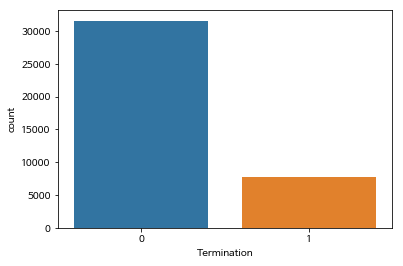

In [45]:
sns.countplot(x = 'Termination', data = ds_merge)

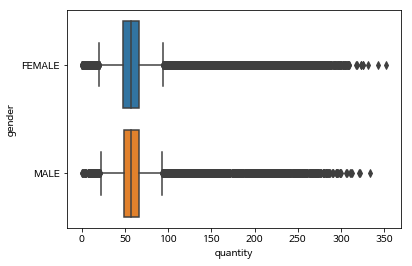

In [46]:
sns.boxplot(x='quantity' , y = 'gender', data = ds_merge)

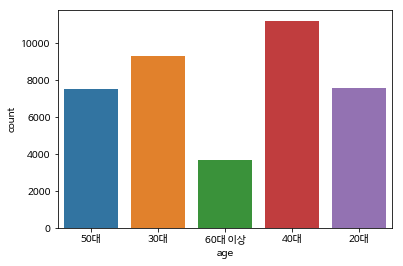

In [47]:
sns.countplot(x='age', data = ds_merge)

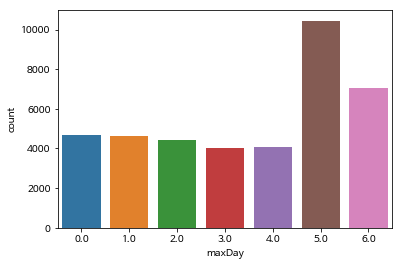

In [48]:
sns.countplot(x='maxDay', data = ds_merge)

In [49]:
'''

for i in range(len(ds_data.gender)):
    if ds_data.gender[i] =='UNKOWN':
        ds_data.gender[i] = np.nan
'''

"\n\nfor i in range(len(ds_data.gender)):\n    if ds_data.gender[i] =='UNKOWN':\n        ds_data.gender[i] = np.nan\n"

In [50]:
'''
for i in range(len(ds_data.age)):
    if ds_data.age[i] =='미상':
        ds_data[i] = np.nan
'''

"\nfor i in range(len(ds_data.age)):\n    if ds_data.age[i] =='미상':\n        ds_data[i] = np.nan\n"

In [51]:
'''
for i in range(len(ds_data.credit)):
    if ds_data.credit[i] =='UNKOWN':
        ds_data.credit[i] = np.nan
'''

"\nfor i in range(len(ds_data.credit)):\n    if ds_data.credit[i] =='UNKOWN':\n        ds_data.credit[i] = np.nan\n"

In [52]:
ds_data = ds_data[ds_data.gender != 'UNKOWN']

In [53]:
ds_data.isnull().sum(axis = 0)

Unnamed: 0      0
gender          0
customerType    0
age             0
marital         0
city            0
cityIS          0
residence       0
channel         0
credit          0
paymentCO       0
quantity        0
maxDay          0
overDue         0
gift            0
Termination     0
productCode     0
TERM            0
PRICE           0
provinceIS      0
province        0
payment         0
dtype: int64

In [54]:
ds_data

,Unnamed: 0,gender,customerType,age,marital,city,cityIS,residence,channel,credit,...,maxDay,overDue,gift,Termination,productCode,TERM,PRICE,provinceIS,province,payment
0,0,MALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,홈쇼핑/인터넷,MIDDLE,...,6,1.0,0,1,EIQ,12,400000,경상도,경상도,CARD
1,1,MALE,PERSONAL,60대 이상,SINGLE,하동군,하동군,APART,렌탈재계약,MIDDLE,...,2,0.0,0,1,EIQ,12,400000,경상도,경상도,CARD
2,2,FEMALE,PERSONAL,40대,MARRIED,하동군,하동군,HOUSE,홈플러스,MIDDLE,...,1,1.0,0,1,EIQ,12,400000,경상도,경상도,CARD
3,3,FEMALE,BUSINESS,40대,MARRIED,하동군,하동군,HOUSE,렌탈재계약,HIGHT,...,2,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
4,4,MALE,PERSONAL,60대 이상,MARRIED,하동군,하동군,HOUSE,홈쇼핑/인터넷,HIGHT,...,1,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
5,5,MALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,렌탈총판,MIDDLE,...,0,1.0,0,1,EMQ,36,400000,경상도,경상도,CARD
6,6,FEMALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,인터넷,MIDDLE,...,5,1.0,0,1,EMQ,36,400000,경상도,경상도,CARD
7,7,FEMALE,PERSONAL,60대 이상,MARRIED,하동군,하동군,HOUSE,서비스 방,HIGHT,...,6,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
8,8,FEMALE,PERSONAL,30대,SINGLE,하동군,하동군,APART,렌탈총판,HIGHT,...,5,0.0,1,1,MIQ,12,800000,경상도,경상도,CARD
9,9,FEMALE,PERSONAL,50대,SINGLE,하동군,하동군,APART,이마트,MIDDLE,...,1,2.0,0,1,MIQ,12,800000,경상도,경상도,CARD


In [55]:
ds_data.isnull().sum(axis = 0)

Unnamed: 0      0
gender          0
customerType    0
age             0
marital         0
city            0
cityIS          0
residence       0
channel         0
credit          0
paymentCO       0
quantity        0
maxDay          0
overDue         0
gift            0
Termination     0
productCode     0
TERM            0
PRICE           0
provinceIS      0
province        0
payment         0
dtype: int64

In [56]:
ds_data = ds_data.dropna()
ds_data.isnull().sum(axis = 0)

Unnamed: 0      0
gender          0
customerType    0
age             0
marital         0
city            0
cityIS          0
residence       0
channel         0
credit          0
paymentCO       0
quantity        0
maxDay          0
overDue         0
gift            0
Termination     0
productCode     0
TERM            0
PRICE           0
provinceIS      0
province        0
payment         0
dtype: int64

In [57]:
ds_data

,Unnamed: 0,gender,customerType,age,marital,city,cityIS,residence,channel,credit,...,maxDay,overDue,gift,Termination,productCode,TERM,PRICE,provinceIS,province,payment
0,0,MALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,홈쇼핑/인터넷,MIDDLE,...,6,1.0,0,1,EIQ,12,400000,경상도,경상도,CARD
1,1,MALE,PERSONAL,60대 이상,SINGLE,하동군,하동군,APART,렌탈재계약,MIDDLE,...,2,0.0,0,1,EIQ,12,400000,경상도,경상도,CARD
2,2,FEMALE,PERSONAL,40대,MARRIED,하동군,하동군,HOUSE,홈플러스,MIDDLE,...,1,1.0,0,1,EIQ,12,400000,경상도,경상도,CARD
3,3,FEMALE,BUSINESS,40대,MARRIED,하동군,하동군,HOUSE,렌탈재계약,HIGHT,...,2,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
4,4,MALE,PERSONAL,60대 이상,MARRIED,하동군,하동군,HOUSE,홈쇼핑/인터넷,HIGHT,...,1,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
5,5,MALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,렌탈총판,MIDDLE,...,0,1.0,0,1,EMQ,36,400000,경상도,경상도,CARD
6,6,FEMALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,인터넷,MIDDLE,...,5,1.0,0,1,EMQ,36,400000,경상도,경상도,CARD
7,7,FEMALE,PERSONAL,60대 이상,MARRIED,하동군,하동군,HOUSE,서비스 방,HIGHT,...,6,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
8,8,FEMALE,PERSONAL,30대,SINGLE,하동군,하동군,APART,렌탈총판,HIGHT,...,5,0.0,1,1,MIQ,12,800000,경상도,경상도,CARD
9,9,FEMALE,PERSONAL,50대,SINGLE,하동군,하동군,APART,이마트,MIDDLE,...,1,2.0,0,1,MIQ,12,800000,경상도,경상도,CARD


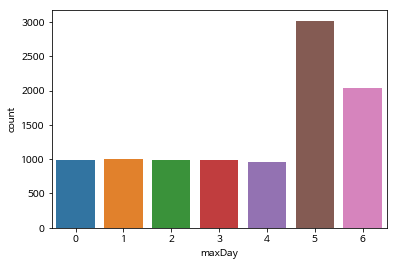

In [58]:
sns.countplot(x='maxDay', data = ds_data)

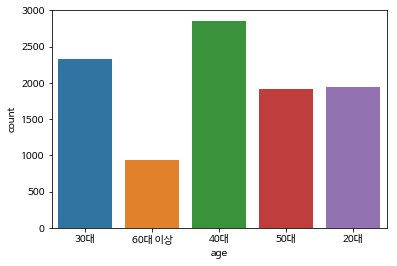

In [59]:
sns.countplot(x='age', data = ds_data)

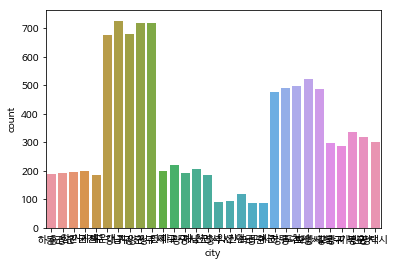

In [60]:
sns.countplot(x='city', data = ds_data)

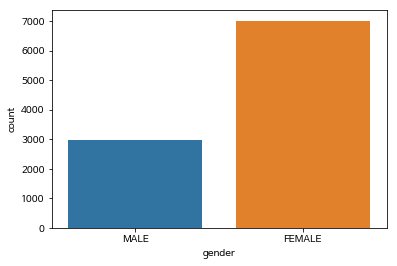

In [61]:
sns.countplot(x="gender", data=ds_data)

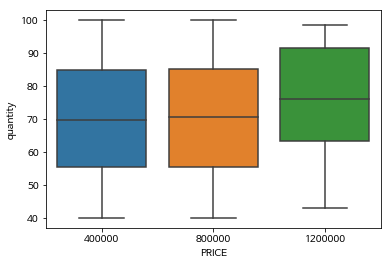

In [62]:
sns.boxplot(data=ds_data, x="PRICE", y="quantity")

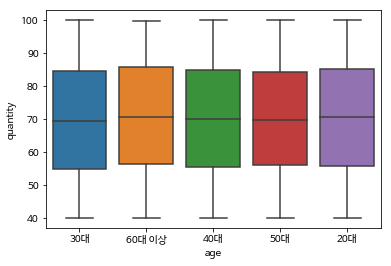

In [63]:
sns.boxplot(data=ds_data, x="age", y="quantity")

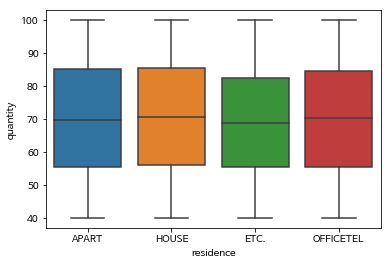

In [64]:
sns.boxplot(data=ds_data, x="residence", y="quantity")

In [65]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["Termination"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["Termination"], columns = data[var], normalize = "columns").round(3))

In [66]:
#스펙
fun_print_crosstab(ds_data, "residence")

residence    APART  ETC.  HOUSE  OFFICETEL
Termination                               
0              497    64    232        206
1             4749   493   1797       1949

residence    APART   ETC.  HOUSE  OFFICETEL
Termination                                
0            0.095  0.115  0.114      0.096
1            0.905  0.885  0.886      0.904


In [67]:
#스펙
fun_print_crosstab(ds_data, "age")

age           20대   30대   40대   50대  60대 이상
Termination                                
0             192   259   280   184      84
1            1749  2075  2577  1731     856

age            20대    30대    40대    50대  60대 이상
Termination                                    
0            0.099  0.111  0.098  0.096   0.089
1            0.901  0.889  0.902  0.904   0.911


In [68]:
#스펙
fun_print_crosstab(ds_data, "credit")

credit       HIGHT  LOW  MIDDLE
Termination                    
0              290   97     612
1             2685  886    5417

credit       HIGHT    LOW  MIDDLE
Termination                      
0            0.097  0.099   0.102
1            0.903  0.901   0.898


In [69]:
#스펙
fun_print_crosstab(ds_data, "payment")

payment      CARD   CMS
Termination            
0             382   617
1            3622  5366

payment       CARD    CMS
Termination              
0            0.095  0.103
1            0.905  0.897


In [70]:
#스펙
fun_print_crosstab(ds_data, "maxDay")

maxDay         0    1    2    3    4     5     6
Termination                                     
0            104   84  102  103  106   292   208
1            888  922  889  879  860  2726  1824

maxDay           0      1      2      3     4      5      6
Termination                                                
0            0.105  0.083  0.103  0.105  0.11  0.097  0.102
1            0.895  0.917  0.897  0.895  0.89  0.903  0.898


In [71]:
#스펙
fun_print_crosstab(ds_data, "payment")

payment      CARD   CMS
Termination            
0             382   617
1            3622  5366

payment       CARD    CMS
Termination              
0            0.095  0.103
1            0.905  0.897


In [72]:
#스펙
fun_print_crosstab(ds_data, "overDue")

overDue      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   13.0
Termination                                                                  
0             618   280    79    12     4     2     2     2     0     0     0
1            5374  2710   693   122    37    23    12    10     4     2     1

overDue       0.0    1.0    2.0   3.0    4.0   5.0    6.0    7.0   8.0   9.0   \
Termination                                                                     
0            0.103  0.094  0.102  0.09  0.098  0.08  0.143  0.167   0.0   0.0   
1            0.897  0.906  0.898  0.91  0.902  0.92  0.857  0.833   1.0   1.0   

overDue      13.0  
Termination        
0             0.0  
1             1.0  


In [73]:
#스펙
fun_print_crosstab(ds_data, "TERM")

TERM           12    36
Termination            
0             620   379
1            5460  3528

TERM            12     36
Termination              
0            0.102  0.097
1            0.898  0.903


In [74]:
#스펙
fun_print_crosstab(ds_data, "PRICE")

PRICE        400000   800000   1200000
Termination                           
0                708      289        2
1               6632     2329       27

PRICE        400000   800000   1200000
Termination                           
0              0.096     0.11    0.069
1              0.904     0.89    0.931


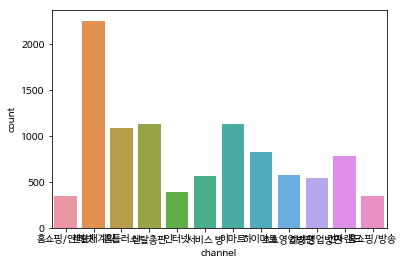

In [75]:
sns.countplot(x='channel', data = ds_data)

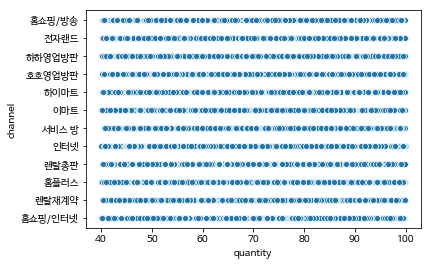

In [76]:
sns.scatterplot(x = "quantity", y= "channel", data = ds_data)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


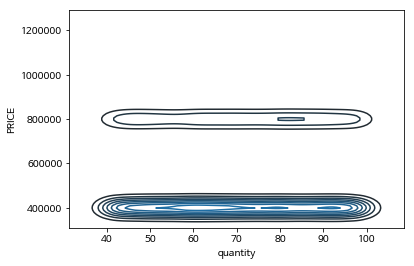

In [77]:
sns.kdeplot(ds_data["quantity"], ds_data["PRICE"], shade = False)

In [78]:
ds_data

,Unnamed: 0,gender,customerType,age,marital,city,cityIS,residence,channel,credit,...,maxDay,overDue,gift,Termination,productCode,TERM,PRICE,provinceIS,province,payment
0,0,MALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,홈쇼핑/인터넷,MIDDLE,...,6,1.0,0,1,EIQ,12,400000,경상도,경상도,CARD
1,1,MALE,PERSONAL,60대 이상,SINGLE,하동군,하동군,APART,렌탈재계약,MIDDLE,...,2,0.0,0,1,EIQ,12,400000,경상도,경상도,CARD
2,2,FEMALE,PERSONAL,40대,MARRIED,하동군,하동군,HOUSE,홈플러스,MIDDLE,...,1,1.0,0,1,EIQ,12,400000,경상도,경상도,CARD
3,3,FEMALE,BUSINESS,40대,MARRIED,하동군,하동군,HOUSE,렌탈재계약,HIGHT,...,2,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
4,4,MALE,PERSONAL,60대 이상,MARRIED,하동군,하동군,HOUSE,홈쇼핑/인터넷,HIGHT,...,1,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
5,5,MALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,렌탈총판,MIDDLE,...,0,1.0,0,1,EMQ,36,400000,경상도,경상도,CARD
6,6,FEMALE,PERSONAL,30대,MARRIED,하동군,하동군,APART,인터넷,MIDDLE,...,5,1.0,0,1,EMQ,36,400000,경상도,경상도,CARD
7,7,FEMALE,PERSONAL,60대 이상,MARRIED,하동군,하동군,HOUSE,서비스 방,HIGHT,...,6,0.0,0,1,EMQ,36,400000,경상도,경상도,CARD
8,8,FEMALE,PERSONAL,30대,SINGLE,하동군,하동군,APART,렌탈총판,HIGHT,...,5,0.0,1,1,MIQ,12,800000,경상도,경상도,CARD
9,9,FEMALE,PERSONAL,50대,SINGLE,하동군,하동군,APART,이마트,MIDDLE,...,1,2.0,0,1,MIQ,12,800000,경상도,경상도,CARD


In [79]:
##바꾸기
#성별
ds_data["gender"].replace(to_replace="FEMALE", value=0, inplace = True)
ds_data["gender"].replace(to_replace="MALE", value=1, inplace = True)
ds_data["customerType"].replace(to_replace="FEMALE", value=0, inplace = True)
ds_data["customerType"].replace(to_replace="MALE", value=1, inplace = True)


In [80]:

#get_dummies : 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_data_dummy = pd.get_dummies(ds_data)
#더미변수 생성된 데이터의 상위 5개 row를 확인
ds_data_dummy.head()

,Unnamed: 0,gender,quantity,maxDay,overDue,gift,Termination,TERM,PRICE,customerType_BUSINESS,...,provinceIS_전라도,provinceIS_충청도,province_경기도,province_경상도,province_부산시,province_서울시,province_전라도,province_충청도,payment_CARD,payment_CMS
0,0,1,62.143369,6,1.0,0,1,12,400000,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,84.379576,2,0.0,0,1,12,400000,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,68.770542,1,1.0,0,1,12,400000,0,...,0,0,0,1,0,0,0,0,1,0
3,3,0,80.904559,2,0.0,0,1,36,400000,1,...,0,0,0,1,0,0,0,0,1,0
4,4,1,97.333574,1,0.0,0,1,36,400000,0,...,0,0,0,1,0,0,0,0,1,0


In [81]:
#dummy 변수로부터 변수 역할 지정
ds_data_y = ds_data_dummy["Termination"]
ds_data_x = ds_data_dummy.drop("Termination", axis = 1, inplace = False)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터비율, random_state : 랜덤)
ds_data_train_x, ds_data_test_x, ds_data_train_y, ds_data_test_y =\
train_test_split(ds_data_x, ds_data_y, test_size = 0.30, random_state = 1234)

# train data 와 test data의 크기 
print("train data X size : {}".format(ds_data_train_x.shape))
print("train data Y size : {}".format(ds_data_train_y.shape))
print("test data X size : {}".format(ds_data_test_x.shape))
print("test data Y size : {}".format(ds_data_test_y.shape))

train data X size : (6990, 127)
train data Y size : (6990,)
test data X size : (2997, 127)
test data Y size : (2997,)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(3, 10)}

#gridSearchCV를 이용하여 의사결정트리
crit = ['gini','entropy']
for atom in crit:
    tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
    tree.fit(ds_data_train_x, ds_data_train_y)
    tree_preds = tree.predict_proba(ds_data_test_x)[:, 1]
    tree_performance = roc_auc_score(ds_data_test_y, tree_preds)
    print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.49250652657362937


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.49548036325681605


In [83]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(ds_data_train_x, ds_data_train_y)

#훈련 데이터 셋 정확도
print("Accucary on training set:{:.3f}".format(svm_uncustomized.score(ds_data_train_x, ds_data_train_y)))
#test 데이터 셋 정확도
print("Accucary on test set:{:.3f}".format(svm_uncustomized.score(ds_data_test_x, ds_data_test_y)))

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accucary on training set:0.925
Accucary on test set:0.900


In [84]:
#train 데이터셋 스케일 조정
ds_data_train_x_scaled = scale(ds_data_train_x, axis = 0)
# test 데이터셋 스케일 조정
ds_data_test_x_scaled = scale(ds_data_test_x, axis = 0)
#스케일이 변경된 X변수 확인
pd.DataFrame(ds_data_train_x_scaled, columns = ds_data_train_x.columns).head()

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


,Unnamed: 0,gender,quantity,maxDay,overDue,gift,TERM,PRICE,customerType_BUSINESS,customerType_PERSONAL,...,provinceIS_전라도,provinceIS_충청도,province_경기도,province_경상도,province_부산시,province_서울시,province_전라도,province_충청도,payment_CARD,payment_CMS
0,0.498043,-0.653316,-1.206379,1.131044,-0.645613,-0.363296,-0.799326,-0.595834,-0.417370,0.417370,...,-0.27396,-0.384671,-0.494853,-0.394172,-0.539755,1.751090,-0.265413,-0.38907,1.238356,-1.238356
1,-0.297796,-0.653316,0.658701,0.633028,-0.645613,2.752578,-0.799326,1.617174,2.395954,-2.395954,...,-0.27396,-0.384671,-0.494853,-0.394172,-0.539755,1.751090,-0.265413,-0.38907,-0.807522,0.807522
2,-0.569555,-0.653316,-1.636401,0.633028,0.532366,-0.363296,1.251055,-0.595834,-0.417370,0.417370,...,-0.27396,-0.384671,2.020801,-0.394172,-0.539755,-0.571073,-0.265413,-0.38907,-0.807522,0.807522
3,0.031576,-0.653316,1.736631,0.135013,0.532366,-0.363296,-0.799326,-0.595834,-0.417370,0.417370,...,-0.27396,-0.384671,-0.494853,-0.394172,-0.539755,1.751090,-0.265413,-0.38907,1.238356,-1.238356
4,1.677052,-0.653316,-1.229724,-0.861018,0.532366,-0.363296,1.251055,-0.595834,-0.417370,0.417370,...,-0.27396,-0.384671,-0.494853,-0.394172,1.852692,-0.571073,-0.265413,-0.38907,1.238356,-1.238356


In [85]:
from sklearn.model_selection import GridSearchCV                                                                                                                                                                                                                                                                                                                                               
from sklearn.metrics import roc_auc_score
param_grid = {'C': np.arange(0.1, 1.1, 0.1),'gamma': np.arange(0 ,1, 0.1)} 
#GridSearchCV를 이용하여 svm의 최적값을 ㅊ자는다
svm = GridSearchCV(svm_uncustomized, param_grid, n_jobs = 8)
svm.fit(ds_data_train_x_scaled, ds_data_train_y)


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
svm.score(ds_data_train_x_scaled, ds_data_train_y), svm.best_score_, svm.best_params_

(0.899856938483548, 0.899856938483548, {'C': 0.1, 'gamma': 0.0})

In [91]:
final=SVC(C = 0.1, gamma = 0.1, random_state = 1234)
final.fit(ds_data_train_x_scaled, ds_data_train_y)

print("train accuracy:{0:.3f}".format(final.score(ds_data_train_x_scaled,ds_data_train_y)))
print("test accuracy:{0:.3f}".format(final.score(ds_data_test_x_scaled,ds_data_test_y)))

train accuracy:0.900
test accuracy:0.900


In [90]:
model2 = SVC(random_state = 1234)
probas = svm.fit(ds_data_train_x_scaled, ds_data_train_y).decision_function(ds_data_test_x_scaled)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics
# y_pred_proba = model2.predict_proba(ds_health_train_x_scaled)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(ds_data_test_y, probas)   
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)

In [ ]:
final=SVC(C = 0.2, gamma = 0.1, random_state = 1234)
final.fit(ds_data_train_x_scaled, ds_data_train_y)

print("train accuracy:{0:.3f}".format(final.score(ds_data_train_x_scaled,ds_data_train_y)))
print("test accuracy:{0:.3f}".format(final.score(ds_data_test_x_scaled,ds_data_test_y)))

In [ ]:
#2.변수 간의 경향성 파악 - 그래프 분석
sns.pairplot(ds_data)

In [ ]:
#2-2 변수 간의 경향성 파악 - 상관관계 분석
#상관관계 분석
ds_data.corr().round(3)

In [ ]:
ds_data.isnull().sum(axis = 0)

In [ ]:
###의사결정 나무
#sklearn.tree 의 DecisionTreeClassifier : 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz : grahviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz
#graphviz import : 의사결정 나무 모델 시각화 .dot 확장자 파일 불러오는 패키지
import graphviz

In [ ]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(ds_data_train_x, ds_data_train_y)

#훈련 데이터 정확도
print("Accucary on training set : {:.3f}".format(tree_uncustomized.score(ds_data_train_x, ds_data_train_y)))
#test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(ds_data_test_x, ds_data_test_y)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth': np.arange(1, 10)}

#gridSearchCV를 이용하여 의사결정트리
crit = ['gini','entropy']
for atom in crit:
    tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
    tree.fit(ds_data_train_x, ds_data_train_y)
    tree_preds = tree.predict_proba(ds_data_test_x)[:, 1]
    tree_performance = roc_auc_score(ds_data_test_y, tree_preds)
    print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

In [ ]:
#graphviz 패키지로 트리 모델 시각화
tree.best_estimator_.fit(ds_data_train_x, ds_data_train_y)
export_graphviz(tree.best_estimator_, out_file = "tree.dot", class_names=["0","1"], feature_names = ds_data_train_x.columns, impurity=False, filled = True)

os.environ["PATH"]+= os.pathsep + "./.wine/drive_c/Program Files (x86)/Graphviz2.38/bin/"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
#랜덤 포레스트 모델 생성 : RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(ds_data_train_x, ds_data_train_y)

In [ ]:
#train 데이터셋 스케일 조정
ds_data_train_x_scaled = scale(ds_data_train_x, axis = 0)
# test 데이터셋 스케일 조정
ds_data_test_x_scaled = scale(ds_data_test_x, axis = 0)
#스케일이 변경된 X변수 확인
pd.DataFrame(ds_data_train_x_scaled, columns = ds_data_train_x.columns).head()

In [ ]:
from sklearn.metrics import roc_auc_score
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(2, 10), 'min_samples_leaf': np.arange(1, 5),'n_estimators': np.arange(1, 15, 3)} 
#gridSearchCV를 이용하여 랜덤포레스트의 최적을 찾는다.
rf = GridSearchCV(rf_uncustomized, param_grid, n_jobs = 8)
rf.fit(ds_data_train_x_scaled, ds_data_train_y)

In [ ]:
rf.score(ds_data_train_x_scaled, ds_data_train_y), rf.best_score_, rf.best_params_

In [ ]:
final=RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2, n_estimators=4, random_state = 1234)
final.fit(ds_data_train_x_scaled, ds_data_train_y)

print("train accuracy:{0:.3f}".format(final.score(ds_data_train_x_scaled,ds_data_train_y)))
print("test accuracy:{0:.3f}".format(final.score(ds_data_test_x_scaled,ds_data_test_y)))

In [ ]:
#그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(ds_data_train_x, ds_data_train_y)
#훈련 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(gb_uncustomized.score(ds_data_train_x, ds_data_train_y)))
#테스트 데이터 셋 정확도
print("Accucary on test set: {:.3f}".format(gb_uncustomized.score(ds_data_test_x, ds_data_test_y)))

In [ ]:
gb_uncustomized

In [ ]:
gb_scaled = GradientBoostingClassifier(random_state=1234)
gb_scaled.fit(ds_data_train_x_scaled, ds_data_train_y)
#훈련 데이터 셋 정확도
print("Accucary on training set:{:.3f}".format(gb_scaled.score(ds_data_train_x_scaled, ds_data_train_y)))
#테스트 데이터 셋 정확도
print("Accucary on test set:{:.3f}".format(gb_scaled.score(ds_data_test_x_scaled, ds_data_test_y)))

In [ ]:
#최종 모델
gb_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, min_samples_leaf = 1, n_estimators = 100, random_state = 1234)
gb_model.fit(ds_data_train_x_scaled, ds_data_train_y)
#gb_model.feature_importances_로 설명변수 중요도 확인
ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_data_train_x.columns
ds_feature_importance["importance"] = gb_model.feature_importances_
ds_feature_importance.sort_values(by="importance", ascending=False).round(3)

#설명변수 중요도 그리는 함수 정의
def plot_feature_importances(model):
    n_features = ds_data_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_data_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)

#설명변수 중요도 그리는 함수 실행
plot_feature_importances(gb_model)

In [ ]:
# KNN 패키지
from sklearn.neighbors import KNeighborsClassifier
#KNN모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier(n_jobs = 8)
knn_uncusotomized

In [ ]:
#데이터 적합
knn_uncusotomized.fit(ds_data_train_x, ds_data_train_y)
#test 데이터로 예측
y_pred = knn_uncusotomized.predict(ds_data_test_x)
print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(ds_data_test_y.tolist()[:10]))
print("accuracy:{0:.3f}".format(knn_uncusotomized.score(ds_data_test_x, ds_data_test_y)))


In [ ]:
#최대 이웃 수
max_n_neighbors = 30  # 반복 수행할 리스트(1~10)
para_n_neighbors = [i+1 for i in range(max_n_neighbors)]
train_accuracy = []
test_accuracy = []
#반복문
for n_neighbors in para_n_neighbors:
    #이웃 1~10개까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(ds_data_train_x, ds_data_train_y)
    #train data 정확도
    train_accuracy.append(clf.score(ds_data_train_x, ds_data_train_y))
    #test data 정확도
    test_accuracy.append(clf.score(ds_data_test_x, ds_data_test_y))
#DataFrame 변환
ds_neighbors = pd.DataFrame()
ds_neighbors["Neighbors"] = para_n_neighbors
ds_neighbors["TrainAccuracy"] = train_accuracy
ds_neighbors["TestAccuracy"] = test_accuracy
ds_neighbors

In [ ]:
#그래프 생성
ds_neighbors.set_index("Neighbors", inplace = False).plot()